In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
dataset = pd.read_csv("dataset2.csv")
dataset.head()

,id,dom_pv,ks_kpt,md_bct,md_ct,md_cvt,user_status
0,173,3,0,4,21,4,0
1,33,1,10,1,4,0,1
2,58,1,0,2,6,0,1
3,177,3,0,0,12,1,0
4,165,2,14,3,12,2,0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   id           212 non-null    int64
 1   dom_pv       212 non-null    int64
 2   ks_kpt       212 non-null    int64
 3   md_bct       212 non-null    int64
 4   md_ct        212 non-null    int64
 5   md_cvt       212 non-null    int64
 6   user_status  212 non-null    int64
dtypes: int64(7)
memory usage: 11.7 KB


In [4]:
dataset.describe()

,id,dom_pv,ks_kpt,md_bct,md_ct,md_cvt,user_status
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,106.500000,1.500000,4.245283,1.834906,8.886792,1.169811,0.500000
std,61.343296,0.910705,7.118911,1.519575,4.793995,1.376662,0.501183
min,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
25%,53.750000,1.000000,0.000000,1.000000,6.000000,0.000000,0.000000
50%,106.500000,1.000000,0.000000,2.000000,7.000000,1.000000,0.500000
75%,159.250000,2.000000,8.000000,3.000000,11.000000,2.000000,1.000000
max,212.000000,5.000000,37.000000,8.000000,33.000000,7.000000,1.000000


In [5]:
dataset.isnull().all()

id             False
dom_pv         False
ks_kpt         False
md_bct         False
md_ct          False
md_cvt         False
user_status    False
dtype: bool

In [6]:
dataset.corr(method='pearson')

,id,dom_pv,ks_kpt,md_bct,md_ct,md_cvt,user_status
id,1.000000,0.413144,0.279435,0.161959,0.569840,0.473154,-0.866035
dom_pv,0.413144,1.000000,-0.135238,0.087329,0.504772,0.211690,-0.446490
ks_kpt,0.279435,-0.135238,1.000000,-0.053193,0.176348,0.136454,-0.329427
md_bct,0.161959,0.087329,-0.053193,1.000000,0.510076,0.122210,-0.295592
md_ct,0.569840,0.504772,0.176348,0.510076,1.000000,0.649946,-0.682495
md_cvt,0.473154,0.211690,0.136454,0.122210,0.649946,1.000000,-0.549520
user_status,-0.866035,-0.446490,-0.329427,-0.295592,-0.682495,-0.549520,1.000000


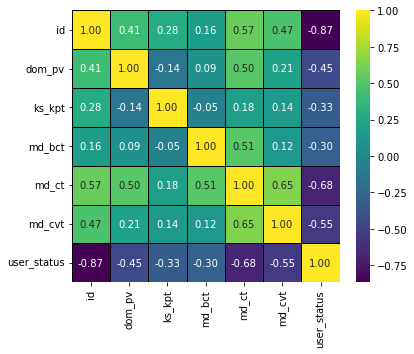

In [7]:
f,ax = plt.subplots(figsize=(6, 5))
#Heatmap for labels
sns.heatmap(dataset.corr(method='pearson'), annot=True, linewidths=0.5,linecolor="black", fmt= '.2f',cmap='viridis',ax=ax)
plt.show()

In [8]:
#preparing data
# Removing User ID column and its data
dataset.drop('id',axis = 1, inplace = True)

<AxesSubplot:xlabel='md_bct', ylabel='user_status'>

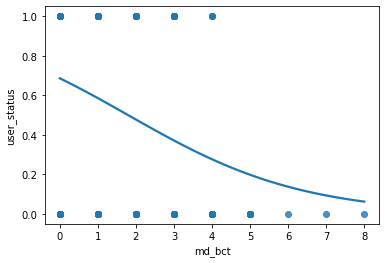

In [9]:
# set inputs and outputs
#Dataset without correct dependent variable values
X = dataset.drop('user_status',axis = 1)     
#Dependent variable values
y = dataset['user_status']
sns.regplot(x=dataset["md_bct"], y=y, data=dataset, logistic=True, ci=None)

In [10]:
# we have to scale the data for better result

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)
data_scaled1 = pd.DataFrame(data_scaled)
data_scaled1.head()

,0,1,2,3,4
0,1.650974,-0.597750,1.428175,2.532727,2.060700
1,-0.550325,0.810284,-0.550734,-1.021770,-0.851756
2,-0.550325,-0.597750,0.108902,-0.603594,-0.851756
3,1.650974,-0.597750,-1.210371,0.650934,-0.123642
4,0.550325,1.373497,0.768539,0.650934,0.604472


In [11]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(data_scaled,y,test_size=0.30,random_state=42)

In [12]:
from sklearn.linear_model import LogisticRegression

# LR model
model = LogisticRegression(C=0.1,max_iter = 500)
# LR model training
model.fit(X_train,y_train)

# LR testing/prediction
y_pred = model.predict(X_test)

In [13]:
# y = B + W*x1...

print(f'Weight Coefficient : {model.coef_}')
print(f'Bias : {model.intercept_}')

Weight Coefficient : [[-0.58184667 -0.60998992 -0.25756831 -1.05772947 -0.80284774]]
Bias : [-0.37801078]


In [14]:
# Accuracy: The amount of correct classifications / the total amount of classifications.
# The train accuracy: The accuracy of a model on examples it was constructed on.
# The test accuracy is the accuracy of a model on examples it hasn't seen.
print(f'Test accuracy: {model.score(X_test,y_test)}')
print(f'Train accuracy: {model.score(X_train,y_train)}')

Test accuracy: 0.90625
Train accuracy: 0.9391891891891891


In [15]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        27
           1       0.92      0.92      0.92        37

    accuracy                           0.91        64
   macro avg       0.90      0.90      0.90        64
weighted avg       0.91      0.91      0.91        64



In [16]:
from sklearn.metrics import confusion_matrix

df = pd.DataFrame(confusion_matrix(y_test, y_pred), columns = ['Predicted Positive', 'Predicted Negative'], 
                  index=['Actual Positive', 'Actual Negative'])
df

,Predicted Positive,Predicted Negative
Actual Positive,24,3
Actual Negative,3,34


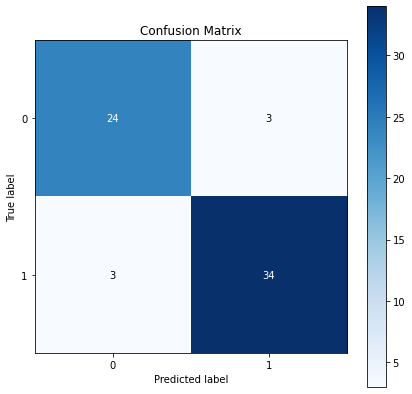

In [17]:
# We can visualize the confusion matrix
import scikitplot.metrics as splt

splt.plot_confusion_matrix(y_test,y_pred,figsize=(7,7))
plt.show()

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_test,y_pred))
print("Precision:", precision_score(y_test, y_pred, ))
print("Recall:", recall_score(y_test,y_pred))
print("F1 Score:", f1_score(y_test,y_pred))

Accuracy: 0.90625
Precision: 0.918918918918919
Recall: 0.918918918918919
F1 Score: 0.918918918918919


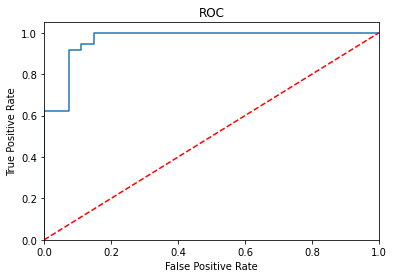

In [19]:
# Area Under Curve - AUC
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds.
model_roc_auc = roc_auc_score(y_test, model.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % model_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim(([0.0, 1.0]))
plt.ylim(([0.0, 1.05]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

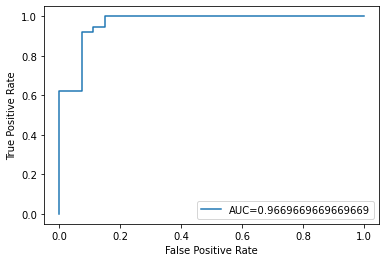

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

#define metrics
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [21]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

clf = LogisticRegression()
model_res = clf.fit(X_train_res, y_train_res)

In [22]:
print(f'Test accuracy {model_res.score(X_test,y_test)}')

Test accuracy 0.90625


In [23]:
print(f'Original: {X_train.shape}')
print(f'With SMOTE: {X_train_res.shape}')

Original: (148, 5)
With SMOTE: (158, 5)
